# Solución a New York Airbnb EDA 

### Paso 1: recopilación de datos

In [1]:
import pandas as pd

total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
total_data.to_csv("../data/raw/total_data.csv", index=False)

### Paso 2: Exploración y limpieza de datos

In [3]:
# Obtener dimensiones
total_data.shape

(48895, 16)

El DataFrame contiene 48.895 registros (filas) y 16 variables (columnas).

In [4]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

De la información anterior, vemos que tenemos algunos registros NaN, siendo los más grandes las columnas `last_review` y `reviews_per_month`.

En cuanto a tipos de datos, tenemos:

- 8 características categóricas (`id`, `name`, `host_id`, `host_name`, `neighbourhood_group`, `neighbourhood`, `room_type`, `availability_365`)
- 8 características numéricas (`latitude`, `longitude`, `price`, `minimum_nights`, `number_of_reviews`, `last_review`, `reviews_per_month`, `calculated_host_listings_count`)

#### Eliminate duplicates

In [5]:
print(f"The number of duplicated Name records is: {total_data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {total_data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


- `name` tiene valores duplicados, lo cual es extraño, pero pueden existir duplicados, ya que las personas pueden poner los mismos nombres, ejemplo: "House in Brooklyn".
- `host_id` puede tener duplicados, porque algunos propietarios tienen varios Airbnb registrados.
- Hay 0 "id" duplicados, lo que significa que todos deben ser registros únicos.

#### Eliminar información irrelevante

In [6]:
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Paso 3: Análisis de variables univariadas

#### Análisis de variables categóricas

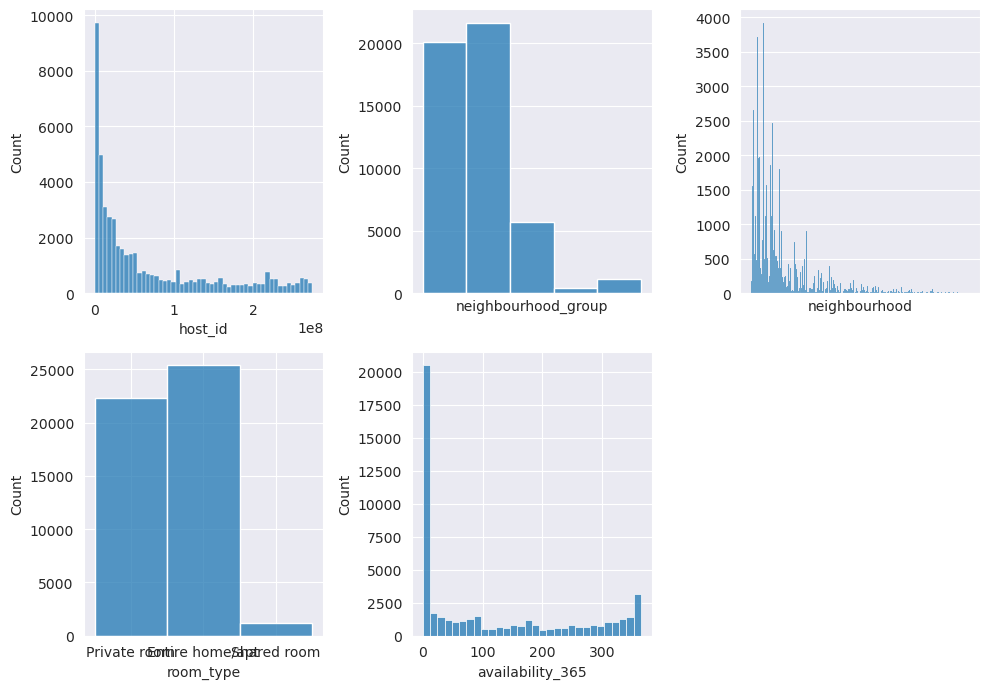

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax=axis[0, 0], data=total_data, x="host_id")
sns.histplot(ax=axis[0, 1], data=total_data, x="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[0, 2], data=total_data, x="neighbourhood").set_xticks([])
sns.histplot(ax=axis[1, 0], data=total_data, x="room_type")
sns.histplot(ax=axis[1, 1], data=total_data, x="availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Podemos observar lo siguiente en el histograma:

* Hay varios anfitriones con muchas habitaciones para alquilar. Pero también hay muchos "NaN" para "host_id".
*En nuestro conjunto de datos, solo tenemos 5 áreas, Brooklyn, Manhattan, Queens, Staten Island y el Bronx, los 5 distritos, lo que confirma que en realidad solo estamos analizando la ciudad de Nueva York.
*Algunos barrios obviamente tienen más ofertas de habitaciones Airbnb que otros.
*Hay más casas/apartamentos completos para alquilar que habitaciones privadas, y las habitaciones compartidas son el tipo de habitación menos disponible.
*La mayoría de las habitaciones están disponibles los 365 días del año, pero en nuestro conjunto de datos hay muchos 0/NaN para esta categoría, lo que tiene que ser un error o falta de información.

#### Análisis de variables numéricas.

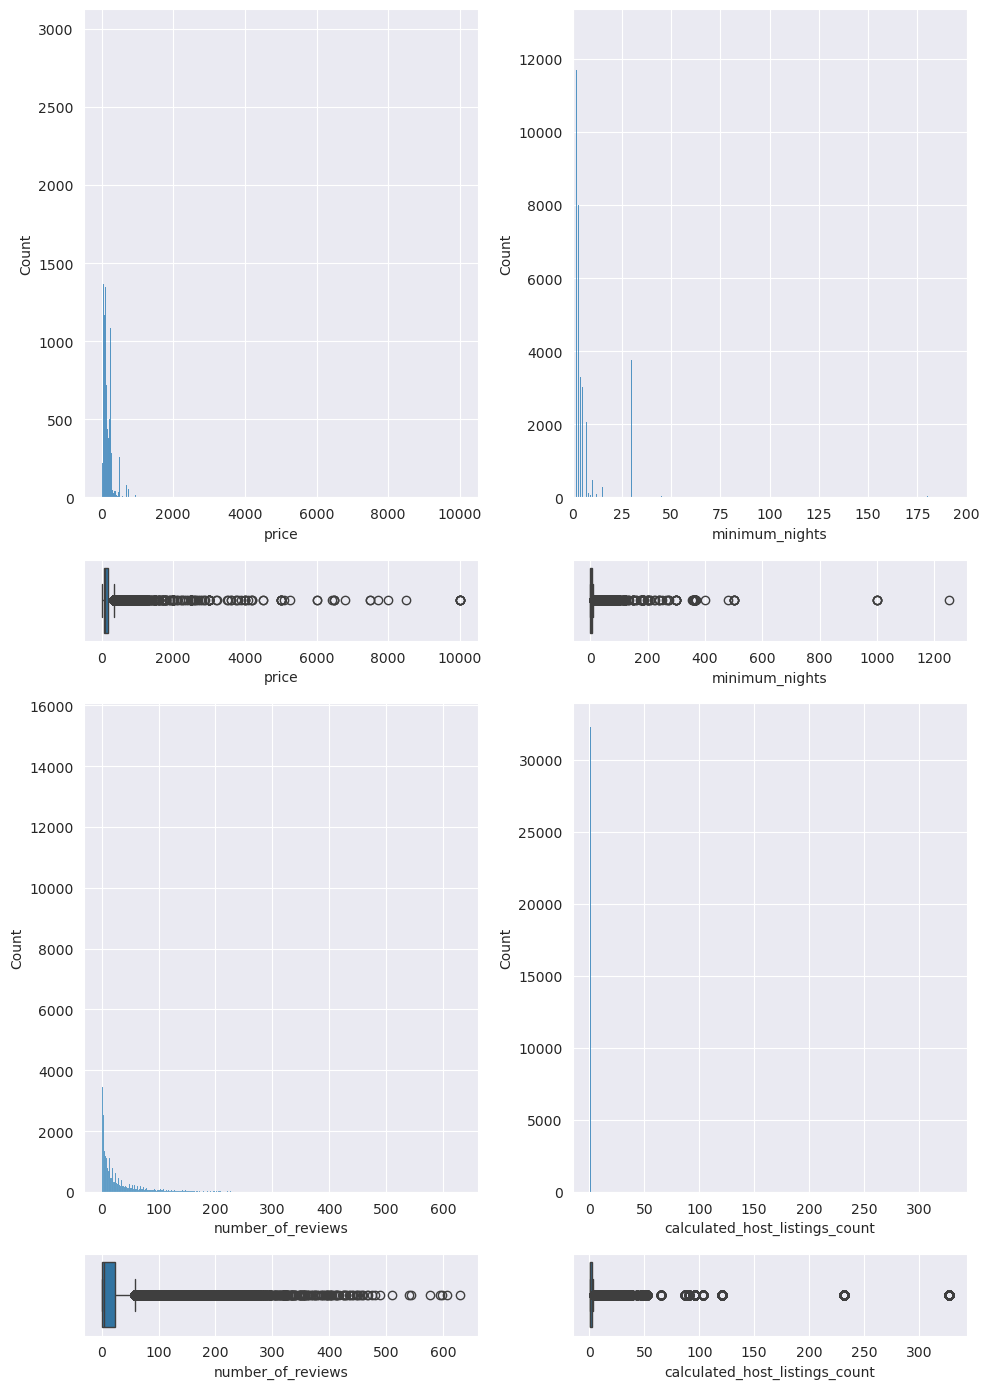

In [8]:
fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax=axis[0, 0], data= total_data, x="price")
sns.boxplot(ax=axis[1, 0], data= total_data, x="price")

sns.histplot(ax=axis[0, 1], data= total_data, x="minimum_nights").set_xlim(0, 200)
sns.boxplot(ax=axis[1, 1], data= total_data, x="minimum_nights")

sns.histplot(ax=axis[2, 0], data=total_data, x="number_of_reviews")
sns.boxplot(ax=axis[3, 0], data=total_data, x="number_of_reviews")

sns.histplot(ax=axis[2, 1], data=total_data, x="calculated_host_listings_count")
sns.boxplot(ax=axis[3, 1], data=total_data, x="calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Paso 4: Análisis de variables multivariadas

#### Análisis numérico-numérico

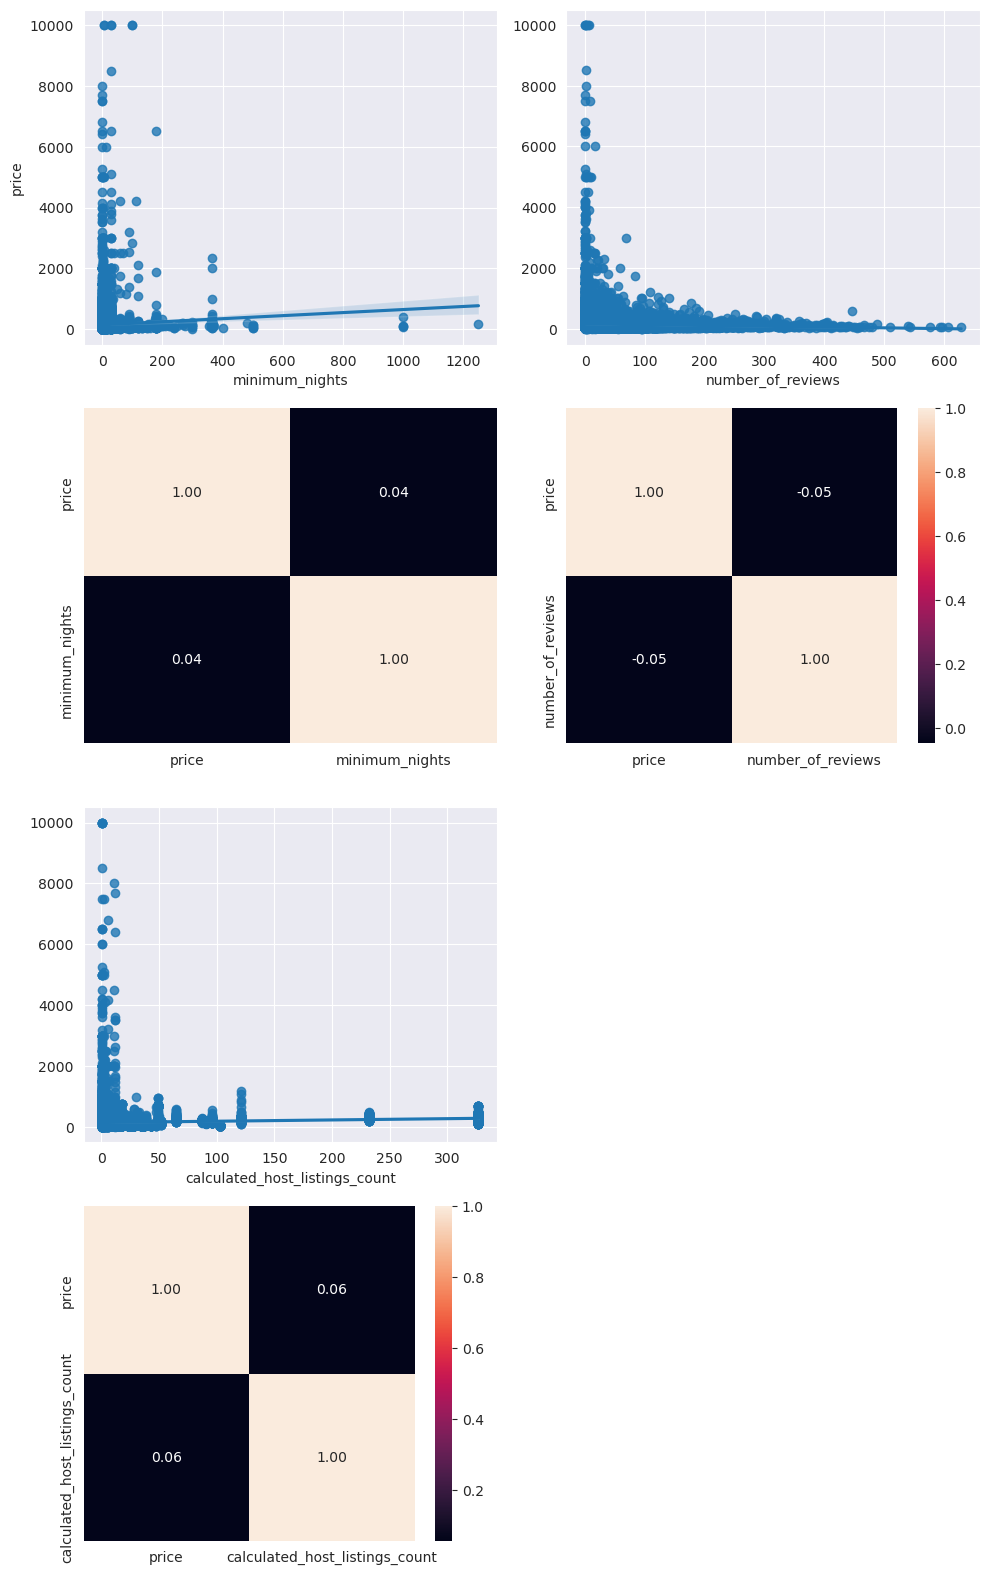

In [9]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize=(10, 16))

# Create Plates 
sns.regplot(ax=axis[0, 0], data=total_data, x="minimum_nights", y="price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="number_of_reviews", y="price").set(ylabel=None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[2, 0], data=total_data, x="calculated_host_listings_count", y="price").set(ylabel=None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0]).set(ylabel=None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Al observar las relaciones anteriores, vemos que por los valores de correlación:

* No existe relación entre el precio y el número mínimo de noches.
* No existe relación entre el número de reseñas y el precio.

#### Análisis categórico-categórico

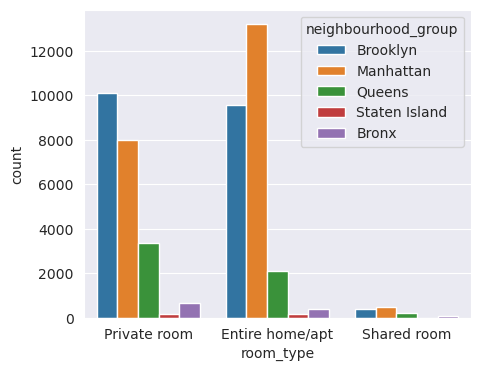

In [10]:
fig, axis = plt.subplots(figsize=(5, 4))

sns.countplot(data=total_data, x="room_type", hue="neighbourhood_group")

# Show the plot
plt.show()

Del análisis categórico podemos concluir:

* Manhattan es el lugar con más lugares para alquilar, y el que tiene más Casas Enteras para alquilar.
* Brooklyn es el segundo grupo más grande en alquiler, pero tiene más habitaciones privadas, lo que significa que probablemente más personas comparten su casa o intentan maximizarla.
* Queens y Bronx son el 3º y 4º y comparten el mismo principio que Brooklyn.
* Staten casi no tiene expresión y no es muy propenso a Airbnb.
Pero aparte de esto, no existe una gran relación entre el tipo de habitación y el vecindario.

#### Análisis numérico-categórico (completo)

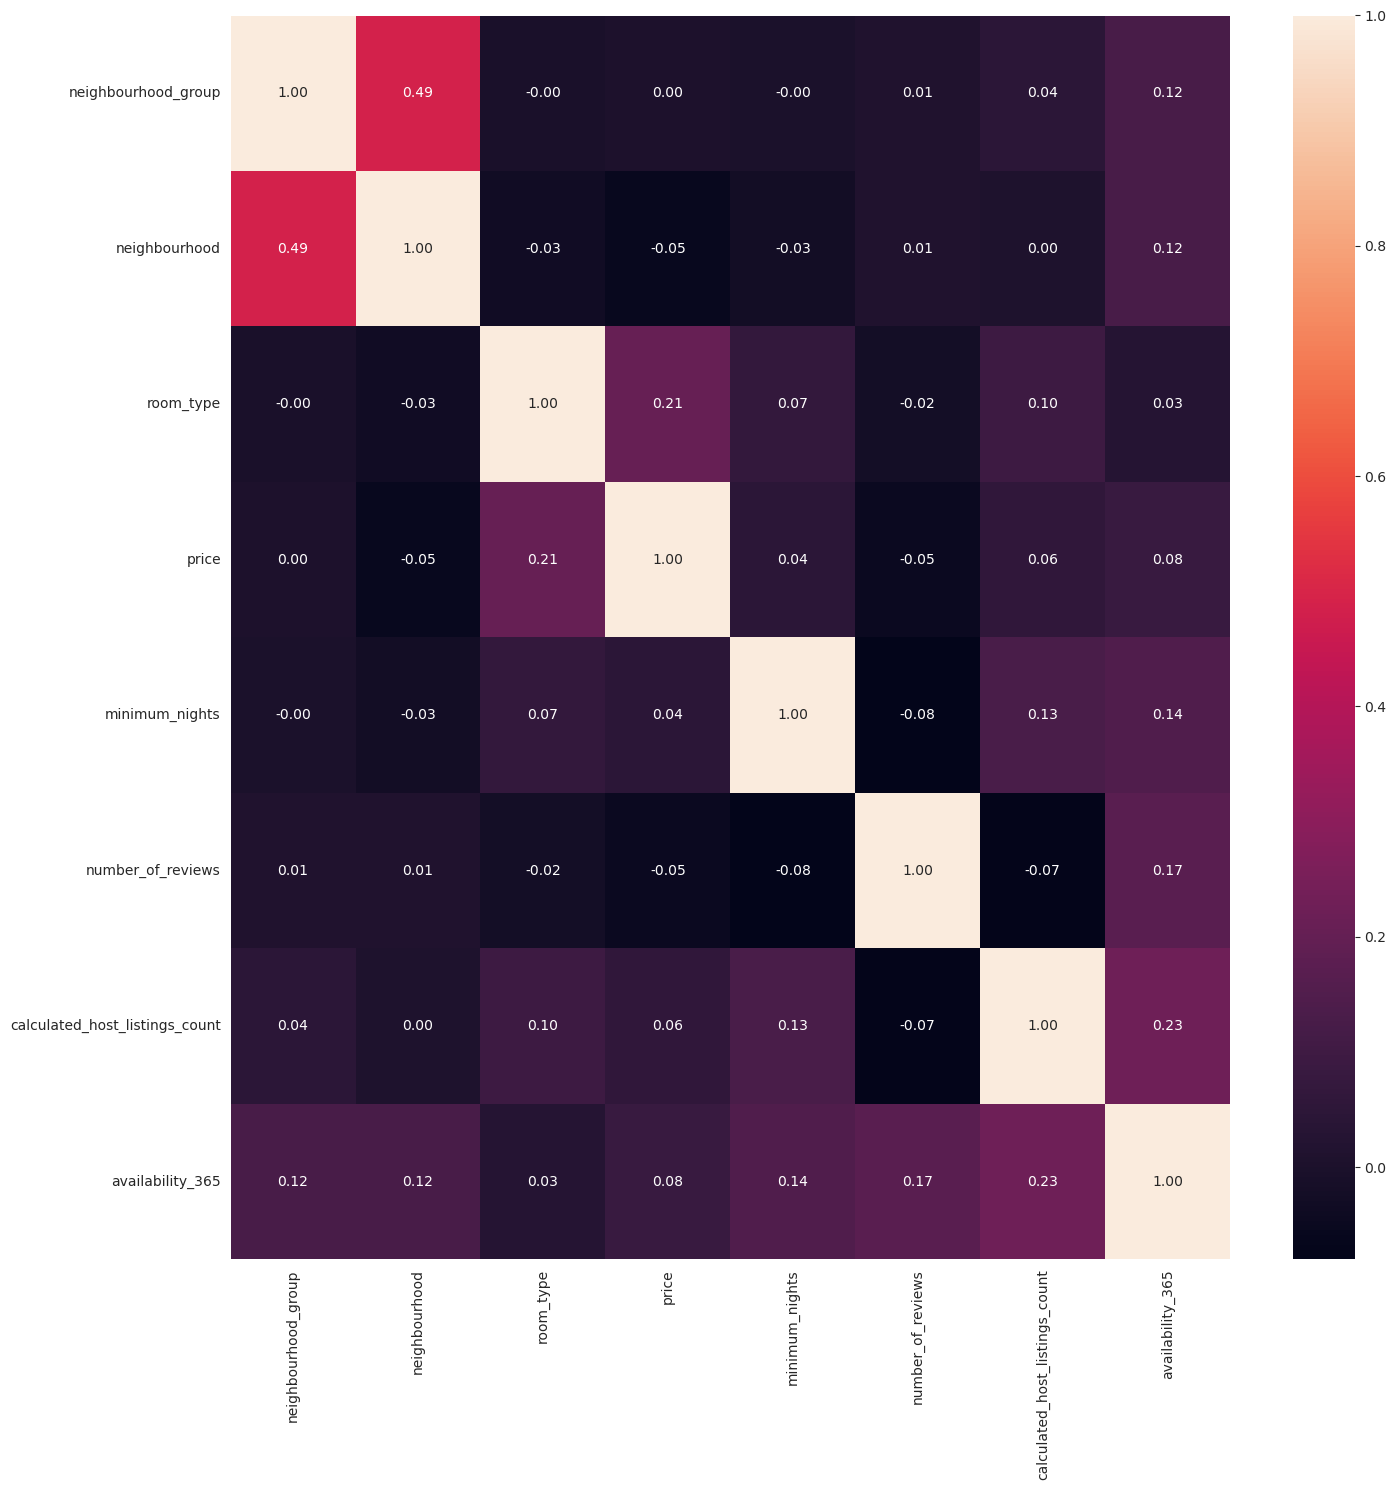

In [11]:
# Factorize the Room Type and Neighborhood Data
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Al observar los datos aquí, hay una correlación muy baja entre todos los datos. A lo sumo:

+ Los anfitriones con más anuncios tienden a tener más disponibilidad.

Aparte de esto, parece muy sombrío sacar una conclusión o relación.

#### Analizando todos los datos a la vez

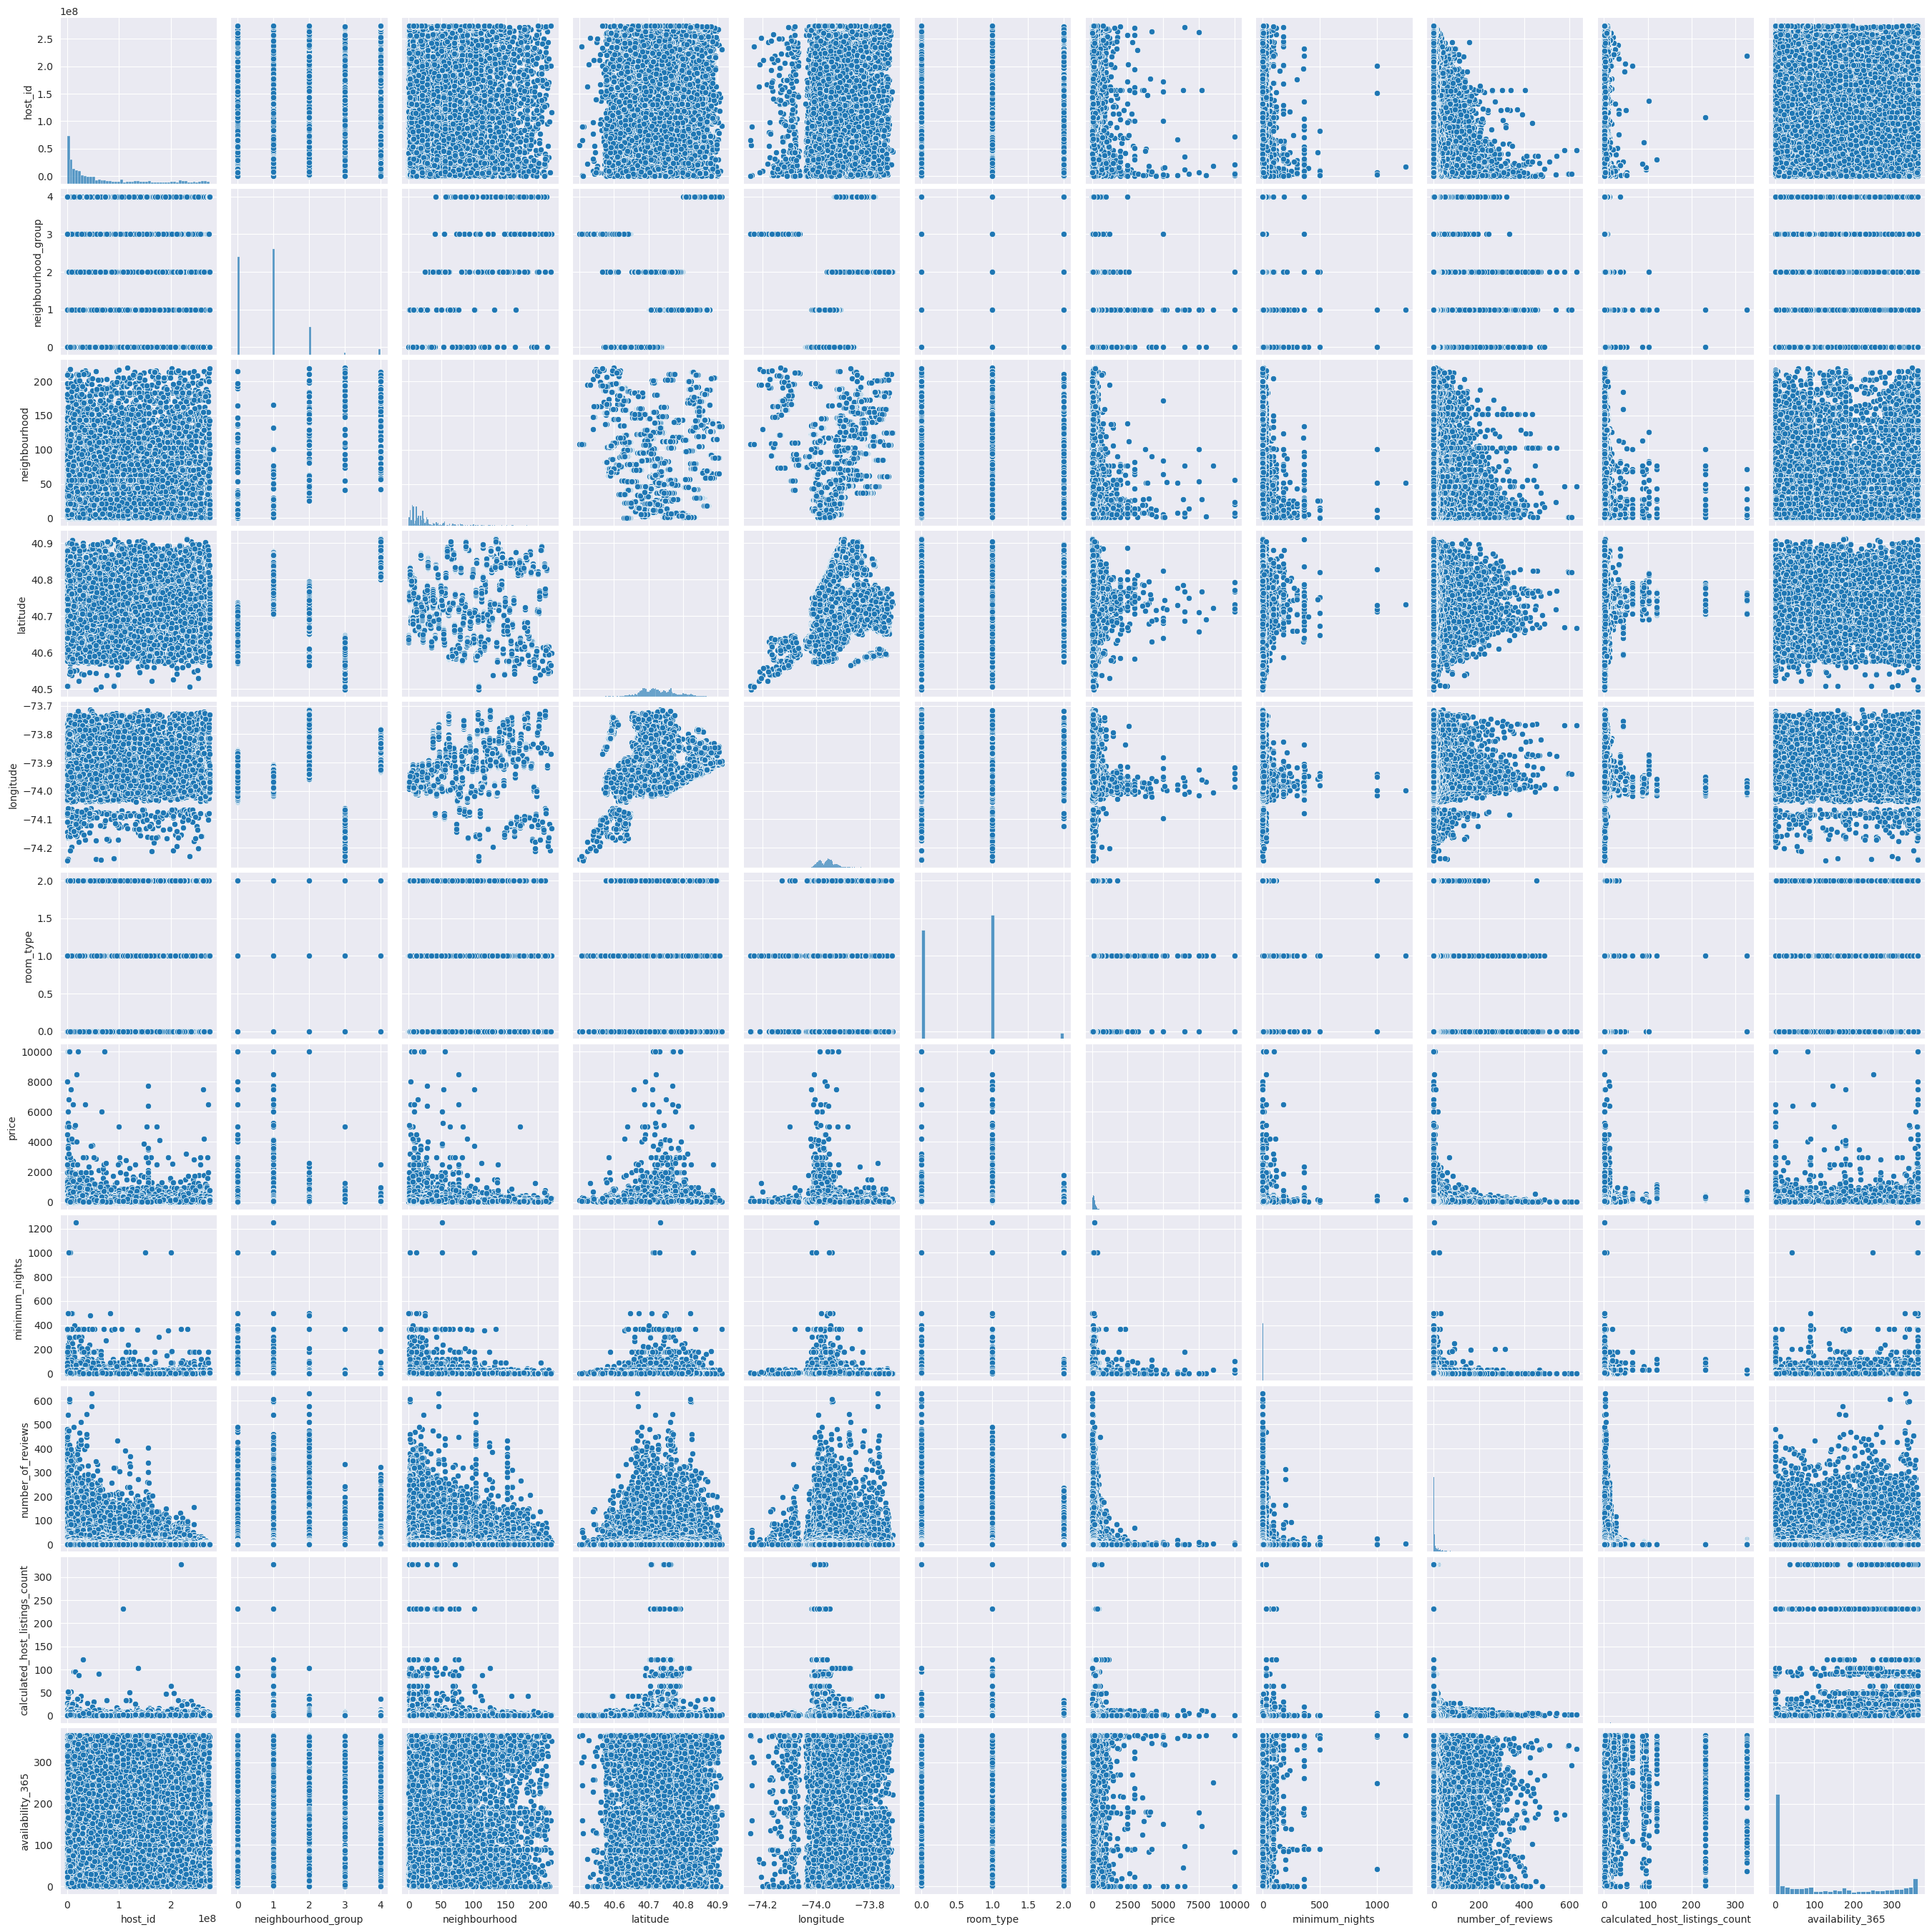

In [12]:
sns.pairplot(data=total_data)

### Paso 5: Ingeniería de funciones

#### Análisis de valores atípicos

In [13]:
total_data.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


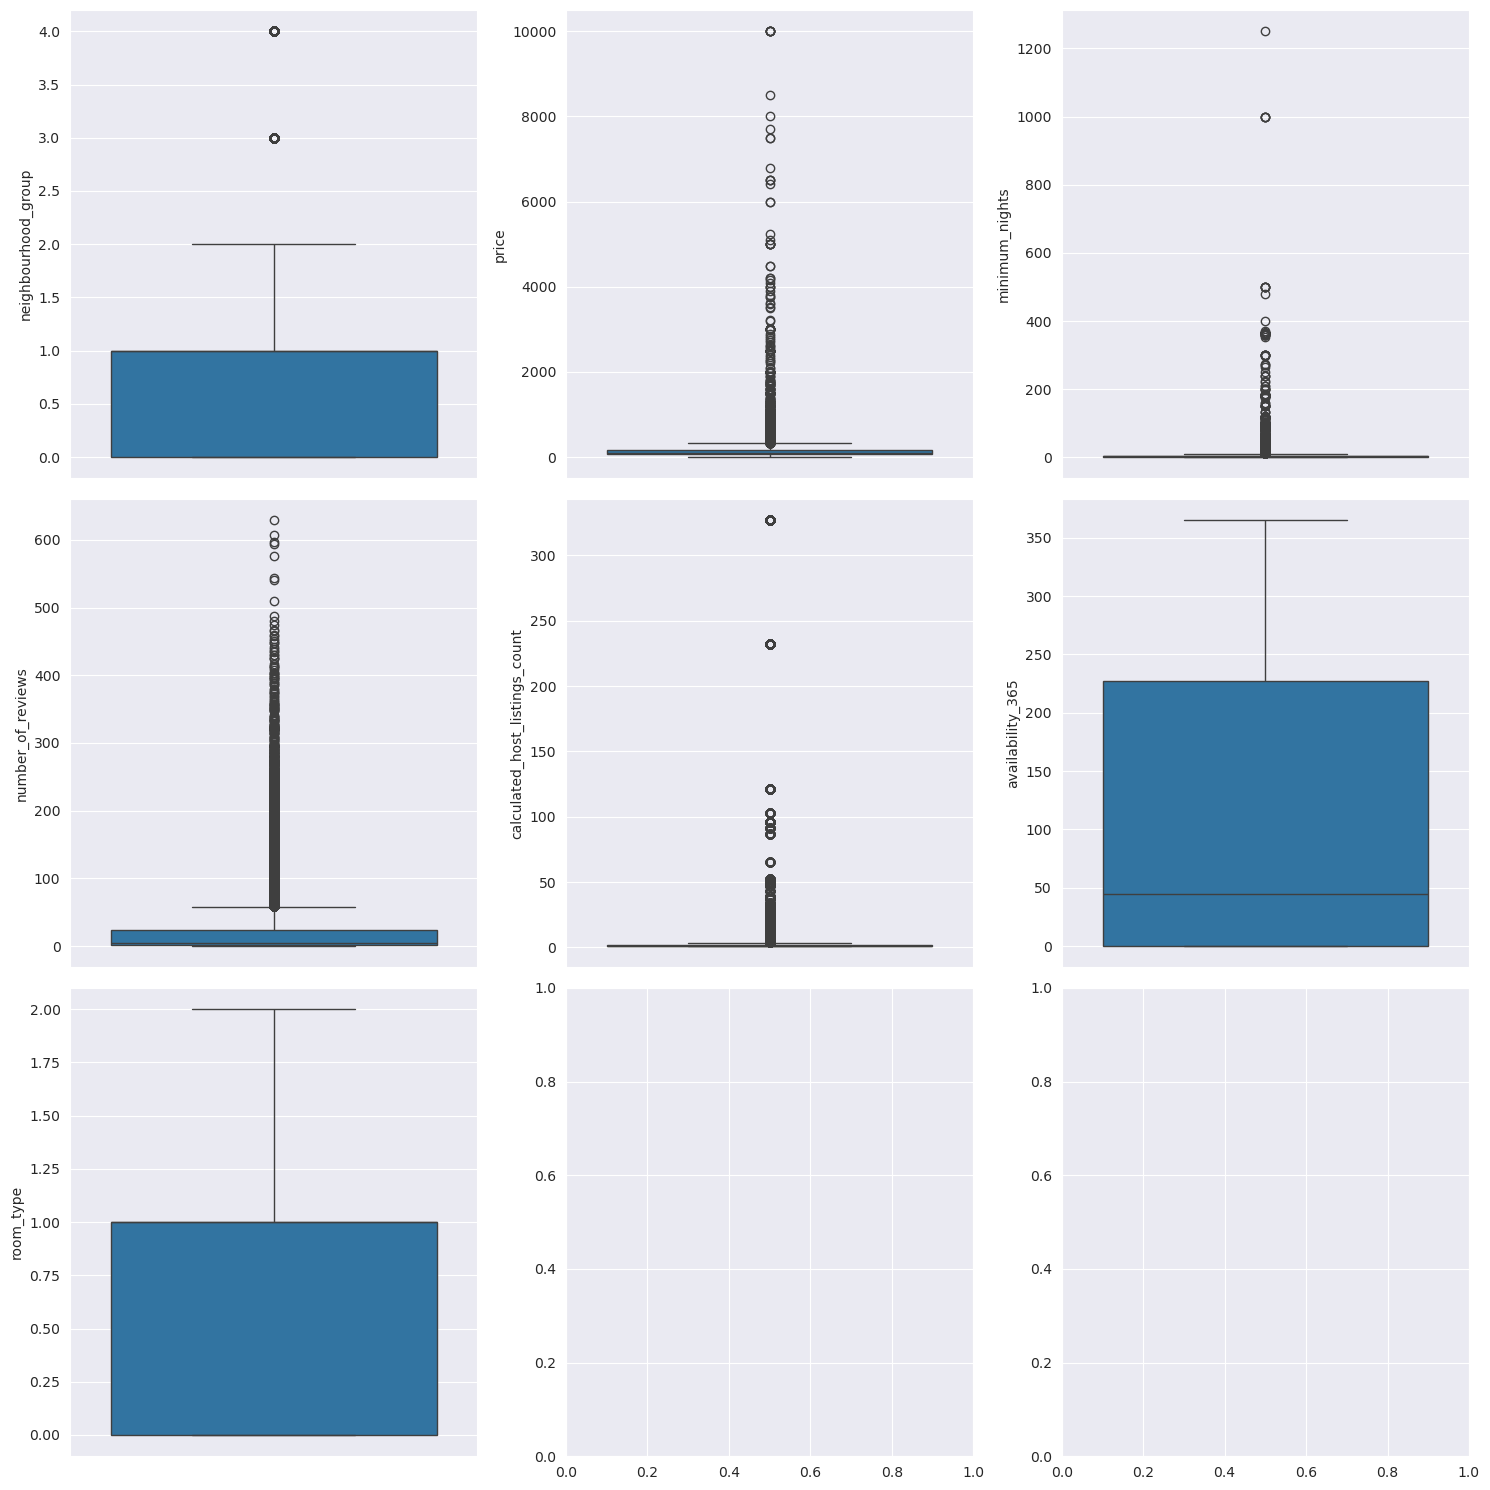

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(ax=axes[0, 0], data=total_data, y="neighbourhood_group")
sns.boxplot(ax=axes[0, 1], data=total_data, y="price")
sns.boxplot(ax=axes[0, 2], data=total_data, y="minimum_nights")
sns.boxplot(ax=axes[1, 0], data=total_data, y="number_of_reviews")
sns.boxplot(ax=axes[1, 1], data=total_data, y="calculated_host_listings_count")
sns.boxplot(ax=axes[1, 2], data=total_data, y="availability_365")
sns.boxplot(ax=axes[2, 0], data=total_data, y="room_type")

plt.tight_layout()

plt.show()

##### Detección de valores atípicos para "price"

In [15]:
# Stats for Price
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [16]:
# IQR for Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [17]:
# Clean the outliers

total_data = total_data[total_data["price"] > 0]

In [18]:
count_0 = total_data[total_data["price"] == 0].shape[0]
count_1 = total_data[total_data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


##### Outlier detection for `minimum_nights`

In [19]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [20]:
# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [21]:
# Clean the outliers

total_data = total_data[total_data["minimum_nights"] <= 15]

In [22]:
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


##### Detección de valores atípicos para`number_of_reviews`

In [23]:
# Stats for number_of_reviews

review_stats = total_data["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [24]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper and lower limits for finding outliers are 66.0 and -38.0, with an interquartile range of 26.0


##### Detección de valores atípicos para `calculated_host_listings_count`

In [25]:
# Stats for calculated_host_listings_count

hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [26]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [27]:
count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40308
Count of 1:  30253
Count of 2:  6179


In [28]:
# Clean the outliers

total_data = total_data[total_data["calculated_host_listings_count"] > 4]

#### Análisis de valor faltante

In [29]:
# Count NaN
total_data.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Escalado de funciones

In [30]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index=total_data.index, columns=num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.071429,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.071429,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.428571,0.003106,0.506849,0.0,0.0,98


### Paso 6: Selección de funciones

In [31]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis=1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


selection_model = SelectKBest(chi2, k=4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.846575,0.0
1,0.071429,1.000000,0.169863,0.5
2,0.071429,0.000000,1.000000,0.0
3,0.428571,0.130435,0.926027,0.0
4,0.071429,1.000000,0.778082,0.5


#### Guarde los datos limpios y sin procesar

In [32]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)